In [4]:
import warnings
warnings.filterwarnings('ignore')
import nltk
import csv

In [5]:
from nltk.corpus import stopwords

In [6]:
import pandas as pd

In [7]:
# shortcut

df = pd.read_csv('SMSSpamCollection.tsv',sep = '\t' , header = None)
df.columns = ['label','body_text']
#df.drop(df[0])
df.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [8]:
print(len(df))


5568


In [9]:
# to check if both the columns have same number of rows

print(len(df['body_text']))
print(len(df['label']))

5568
5568


In [10]:
df.shape

(5568, 2)

In [11]:
print("Spams : {} \nHams : {}".format(len(df[df['label']=='spam']),len(df[df['label']=='ham'])))

Spams : 746 
Hams : 4822


In [12]:
# missing data

print(df['label'].isnull().sum())
print(df['body_text'].isnull().sum())

0
0


In [13]:
# Pre-processing Of Data

In [14]:
pd.set_option('Display.max_colwidth',100)
df.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [15]:
import re
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct
df['body_text_clean'] = df['body_text'].apply(lambda x: remove_punct(x))
df.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


In [17]:
def tokenize(text):
    tokens = re.split('\W+',text)
    return tokens
df['body_text_tokenized']=df['body_text_clean'].apply(lambda x: tokenize(x.lower()))
df.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [18]:
stopwords = nltk.corpus.stopwords.words('english')

In [19]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text
df['body_text_nostop'] = df['body_text_tokenized'].apply(lambda x: remove_stopwords(x))
df.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


In [20]:
# Lemmetizing
ws = nltk.WordNetLemmatizer()

In [21]:
def lemmetizing(tokenized_text):
    text = " ".join([ws.lemmatize(word) for word in tokenized_text])
    return text
df['body_text_lemmetize'] = df['body_text_nostop'].apply(lambda x: lemmetizing(x))
df.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_lemmetize
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...",ive searching right word thank breather promise wont take help granted fulfil promise wonderful ...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questions...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]",nah dont think go usf life around though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]",even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]",date sunday


In [22]:
df_clean = df.loc[:,('label','body_text','body_text_lemmetize')]
df_clean

,label,body_text,body_text_lemmetize
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,ive searching right word thank breather promise wont take help granted fulfil promise wonderful ...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questions...
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think go usf life around though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday
...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...,2nd time tried 2 contact u u 750 pound prize 2 claim easy call 087187272008 now1 10p per minute ...
5564,ham,Will ü b going to esplanade fr home?,ü b going esplanade fr home
5565,ham,"Pity, * was in mood for that. So...any other suggestions?",pity mood soany suggestion
5566,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...,guy bitching acted like id interested buying something else next week gave u free


In [23]:
# Feature_extraction

df_clean['body_length'] = df_clean['body_text'].apply(lambda x:len(x) - x.count(" "))

In [24]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100
df_clean['punct%'] = df_clean['body_text'].apply(lambda x: count_punct(x))

In [25]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

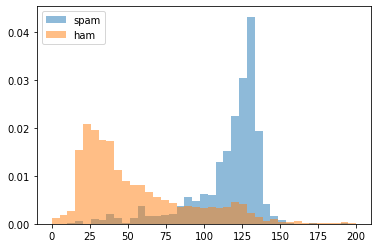

In [26]:
# Feature_evaluation

bins = np.linspace(0,200,40)
pyplot.hist(df_clean[df_clean['label']=='spam']['body_length'], bins, alpha=0.5, density = True, label='spam')
pyplot.hist(df_clean[df_clean['label']=='ham']['body_length'], bins, alpha=0.5, density = True, label='ham')
pyplot.legend(loc= 'upper left')
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

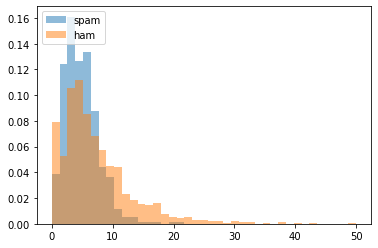

In [27]:
bins = np.linspace(0,50,40)
pyplot.hist(df_clean[df_clean['label']=='spam']['punct%'], bins, alpha=0.5, density = True, label='spam')
pyplot.hist(df_clean[df_clean['label']=='ham']['punct%'], bins, alpha=0.5, density = True, label='ham')
pyplot.legend(loc= 'upper left')
pyplot.show

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_clean[['body_text', 'body_length', 'punct%']], df_clean['label'],test_size = 0.2)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ws.lemmatize(word) for word in tokens if word not in stopwords]
    return text

In [31]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(x_train['body_text'])

tfidf_train = tfidf_vect_fit.transform(x_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(x_test['body_text'])

x_train_vect = pd.concat([x_train[['body_length', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
x_test_vect = pd.concat([x_test[['body_length', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

x_train_vect.head()

,body_length,punct%,0,1,2,3,4,5,6,7,...,7878,7879,7880,7881,7882,7883,7884,7885,7886,7887
0,49,4.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,10.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,113,7.1,0.142029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,199,4.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33,3.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
tfidf_test.toarray()

array([[0.21646972, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [33]:
pd.DataFrame(tfidf_train.toarray())

,0,1,2,3,4,5,6,7,8,9,...,7878,7879,7880,7881,7882,7883,7884,7885,7886,7887
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.142029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4450,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4451,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4452,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import GridSearchCV
import time

In [35]:
'''rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300], 
         'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv= 5, n_jobs=-1)
gs_fit = gs.fit(X_features, df_clean['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending = False)[0:5]'''

"rf = RandomForestClassifier()\nparam = {'n_estimators': [10, 150, 300], \n         'max_depth': [30, 60, 90, None]}\n\ngs = GridSearchCV(rf, param, cv= 5, n_jobs=-1)\ngs_fit = gs.fit(X_features, df_clean['label'])\npd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending = False)[0:5]"

In [37]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(x_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred_rf = rf_model.predict(x_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred_rf, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'
      .format(round(fit_time, 3), round(pred_time, 3), 
              round(precision, 3), round(recall, 3), round((y_pred_rf==y_test).sum()/len(y_pred_rf), 3)))

Fit time: 8.535 / Predict time: 0.265 ---- Precision: 1.0 / Recall: 0.871 / Accuracy: 0.984


In [38]:
'''gb = GradientBoostingClassifier()
param2 = {'n_estimators': [100, 150], 
         'max_depth': [7, 11, 15],
         'learning_rate': [0.1]}

gs = GridSearchCV(gb, param2, cv= 5, n_jobs=-1)
gs_fit = gs.fit(X_features, df_clean['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending = False)[0:5]'''

"gb = GradientBoostingClassifier()\nparam2 = {'n_estimators': [100, 150], \n         'max_depth': [7, 11, 15],\n         'learning_rate': [0.1]}\n\ngs = GridSearchCV(gb, param2, cv= 5, n_jobs=-1)\ngs_fit = gs.fit(X_features, df_clean['label'])\npd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending = False)[0:5]"

In [40]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time()
gb_model = gb.fit(x_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred_gb = gb_model.predict(x_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred_gb, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'
      .format(round(fit_time, 3), round(pred_time, 3), 
              round(precision, 3), round(recall, 3), round((y_pred_gb==y_test).sum()/len(y_pred_gb), 3)))

Fit time: 233.841 / Predict time: 0.227 ---- Precision: 0.952 / Recall: 0.857 / Accuracy: 0.977


In [41]:
MNB = MultinomialNB()

start = time.time()
MNB_model = MNB.fit(x_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred_MNB = MNB_model.predict(x_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred_MNB, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'
      .format(round(fit_time, 3), round(pred_time, 3), 
              round(precision, 3), round(recall, 3), round((y_pred_MNB==y_test).sum()/len(y_pred_MNB), 3)))

Fit time: 0.492 / Predict time: 0.092 ---- Precision: 0.964 / Recall: 0.579 / Accuracy: 0.944


In [117]:
body_text = [input("Enter SMS :")]
body_length = len(body_text[0]) - body_text[0].count(" ")
punct = count_punct(body_text[0])
SMS = pd.DataFrame({'body_text':body_text,'body_length':body_length,'punct%':punct})
SMS_test = tfidf_vect_fit.transform(SMS['body_text'])
SMS_test_vect = pd.concat([SMS[['body_length', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(SMS_test.toarray())], axis=1)

Enter SMS :Wait that's still not all that clear, were you not sure about me being sarcastic or that that's why x doesn't want to live with us


In [118]:
SMS_pred_rf = rf_model.predict(SMS_test_vect)
SMS_pred_rf

array(['ham'], dtype=object)

In [119]:
SMS_pred_gb = gb_model.predict(SMS_test_vect)
SMS_pred_gb

array(['ham'], dtype=object)

In [120]:
SMS_pred_MNB = MNB_model.predict(SMS_test_vect)
SMS_pred_MNB

array(['ham'], dtype='<U4')